#Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()   #use seaborn plotting defaults

###Question 1
####sklearn.datasets._samples_generator 모듈에 들어있는 make_blobs 함수를 이용해서 데이터를 생성하고 plot하기.
####sklearn.datasets에는 classification 모델의 테스트를 위해 가상의 데이터를 생성하는 함수를 제공함. 그 중에서 make_blobs함수는 클러스팅용 가상데이터를 주로 생성하는데 사용됨.

In [2]:
#가상의 데이터 생성
from sklearn.datasets._samples_generator import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.6)

In [3]:
print(X.shape)
print(y.shape)
#print(X)
#print(y)

(50, 2)
(50,)


Text(0.5, 1.0, 'Datasets Random State = 0')

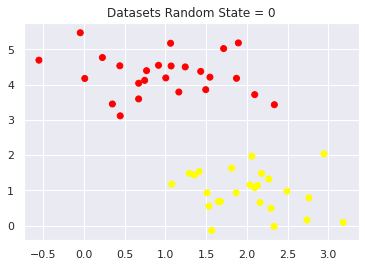

In [4]:
x1 = X[:,0]
x2 = X[:,1]
plt.scatter(x1, x2, c=y, cmap='autumn')
plt.title("Datasets Random State = 0")

###Question 2
####임의의 linear decision boundary 생성하기.
####다음과 같은 기울기와 y절편을 가진 3개의 경계선을 plot하기. 
(기울기, 절편) : (1, 0.65) , (0.5, 1.6) , (-0.2, 2.9)

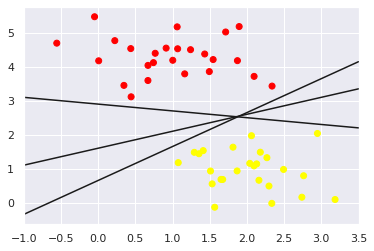

In [5]:
xfit = np.linspace(-1, 3.5)
plt.xlim(-1, 3.5)

#plot data
plt.scatter(x1, x2, c=y, cmap='autumn')

#임의의 linear decision boundary 생성
for a, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  yfit = a*xfit+b
  plt.plot(xfit, yfit, c='k')

###Question 3
####임의의 margin값을 표현하기. Plot한 뒤 어느 경계선이 가장 적합한 경계선인지 선택하고, 그 이유 설명하기
(기울기, y절편, margin) : (1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)
pyploy모듈에 있는 fill_between 함수를 이용하여 경계선에 margin을 표현할 수 있음. color code는 '#AAAAA' (옅은 회색)

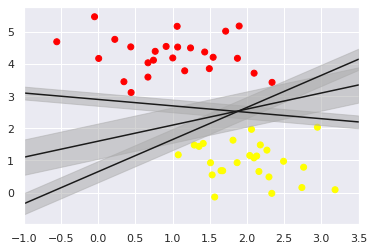

In [6]:
xfit = np.linspace(-1, 3.5)
plt.xlim(-1, 3.5)

#plot data
plt.scatter(x1, x2, c=y, cmap='autumn')

#margin 표현
for a, b, margin in [(1, 0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]:
  yfit = a*xfit+b
  plt.plot(xfit, yfit, c='k')
  plt.fill_between(xfit, yfit+margin, yfit-margin, color='#AAAAAA', alpha=0.5)

#####(기울기, y절편, margin) : (0.5, 1.6, 0.55) 인 경계선이 가장 적합하다. 
#####왜냐하면, SVM은 support vector와 decision boundary 사이의 distance인 margin을 최대로 하는 decision boundary를 찾는 것이 목표인데, (기울기, y절편, margin) : (0.5, 1.6, 0.55) 인 경계선에서 support vector와 decision boundary 사이의 거리가 가장 멀다. 즉, 이때의 margin이 가장 크다.

###Question 4
####sklearn 모듈의 svm.SVC 함수를 사용해서 model 만들기

In [7]:
#support vector classifier
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

###Question 5
####SVC를 통해 만든 model을 입력으로 받는 'plot_svc_decision_function' 구현하기

In [8]:
#plot the decision function for a 2D SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):

  #범위 설정
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #grid 설정
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  xfit, yfit = np.meshgrid(x, y)                   #grid 생성
  xy = np.vstack([xfit.ravel(), yfit.ravel()]).T   #vstack 배열 결합

  #probabilities 예측
  svm = model.decision_function(xy).reshape(xfit.shape)
  
  #decision boundary & margins 그리기
  ax.contour(xfit, yfit, svm, colors='k', levels=[-1,0,1], linestyles=['--','-','--'])

  #support vectors 그리기
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], marker='o', s=300, facecolors='none', edgecolors='k') 

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

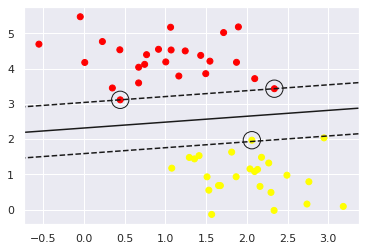

In [9]:
x1 = X[:,0]
x2 = X[:,1]
plt.scatter(x1, x2, c=y, cmap='autumn')
plot_svc_decision_function(model);

In [10]:
print(model.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


###Question 6
####make_blobs 의 sample data를 60, 120, 180으로 증가시키고, plot_svc_decision_function 함수를 이용해서 3개의 plot 출력하기

In [11]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples = N, centers = 2, random_state = 0, cluster_std = 0.6)
  x1 = X[:,0]
  x2 = X[:,1]
  
  model = SVC(kernel='linear')
  model.fit(X,y)

  ax = ax or plt.gca()
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)

  #plot data
  ax.scatter(x1, x2, c=y, cmap='autumn')

  #plot decision boundary & support vectors
  plot_svc_decision_function(model, ax)

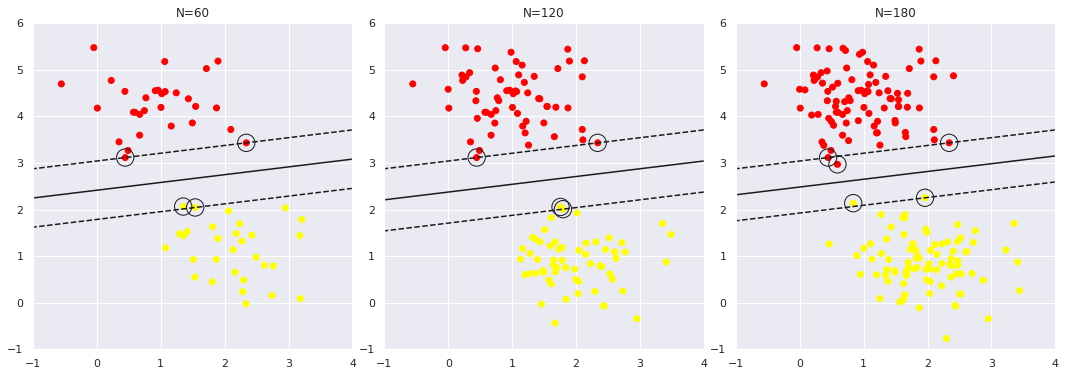

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120, 180]):
  plot_svm(N, axi)
  axi.set_title('N={0}'.format(N))

###Turning the SVM: softening margins
margin을 hard하게 설정하는 것과 soft하게 설정하는 것의 차이가 무엇인지 확인

(100, 2)
(100,)


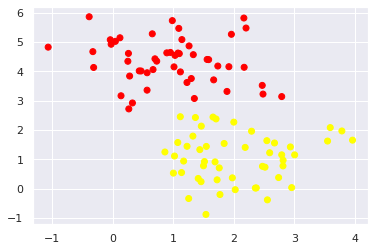

In [13]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
print(X.shape)
print(y.shape)

x1 = X[:,0]
x2 = X[:,1]

#plot data
plt.scatter(x1, x2, c=y, cmap='autumn')

###Question 7
####svm.SVC 함수의 parameter의 'C'를 통해 regularization을 조절할 수 있음. margin을 어느정도로 유연하게 잡을 지 결정할 수 있음
####C의 값을 10.0과 0.1로 설정한 두 개의 figure를 plot하고 support vector의 개수 차이와 그 이유 서술하기.

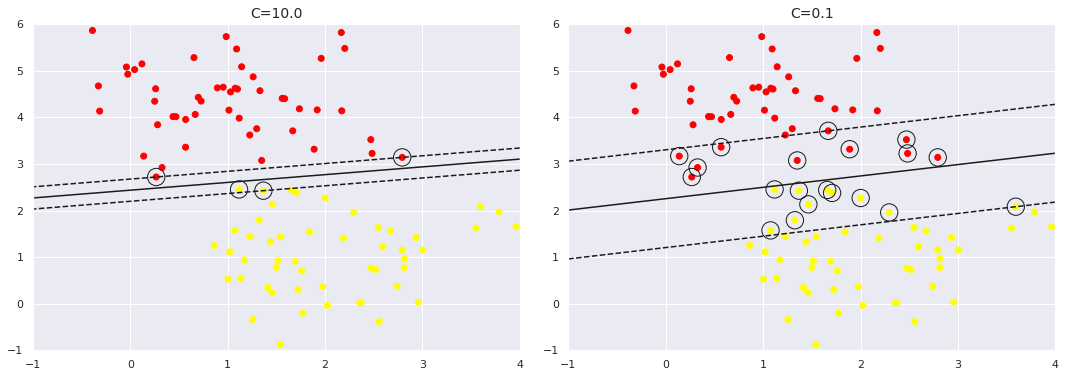

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C)
  model.fit(X,y)

  axi = axi or plt.gca()
  axi.set_xlim(-1, 4)
  axi.set_ylim(-1, 6)

  #plot data
  axi.scatter(x1, x2, c=y, cmap='autumn')

  #plot decision boundary & support vectors
  plot_svc_decision_function(model, axi)

  axi.set_title('C={0:.1f}'.format(C), size=14)

#####C가 10.0일 경우, margin이 작은 것을 확인할 수 있다. margin이 작을 경우, support vector의 갯수는 적다.
#####C가 0.1일 경우, margin이 큰 것을 확인할 수 있다. margin이 클 경우, support vector의 갯수는 많다.
#####C값이 크면 margin을 최대화시키는 목적함수의 비중이 낮아서 margin이 작아지고, margin 내에 존재하는 support vector 개수가 적다. C값이 작으면 margin을 최대화시키는 목적함수의 비중이 높아서 margin이 커지고, margin 내에 존재하는 support vector 개수가 많다.

###Question 8
####Gaussian Kernel을 이용하여 SVM 진행하기. Linear Decision Boundary를 구하고, plot하기.
####해당 figure에서 잘못된 점 서술하고, SVC 함수의 'kernel' parameter를 'rbf'로 변경해서 적절한 Decision Boundary를 plot하기.
gaussian kernel: 데이터 간의 유사도를 측정하는 기준임. _sample_generater 모듈의 make_circles 함수를 사용하여 데이터를 생성하고 plot하기.

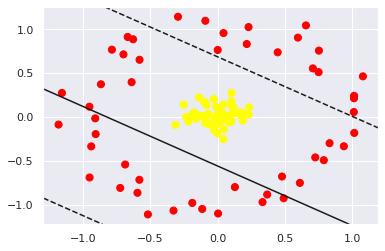

In [17]:
from sklearn.datasets._samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
model = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model, plot_support=False)

데이터의 분포가 linear하지 않아서 linear한 decision boundary로 데이터를 분류할 수 없다.

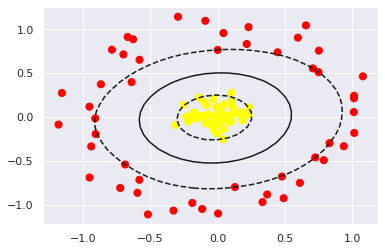

In [19]:
model_G = SVC(kernel='rbf').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model_G, plot_support=False)

###Question 9
####Gaussian Kernel을 이용해서 2D figure를 3D figure로 plot하기 (Gaussian kernel은 'z'로 정의되어 있음)

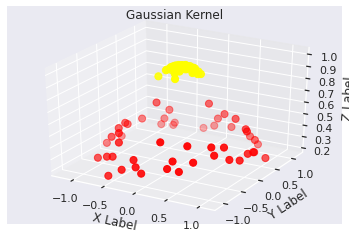

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = np.exp(-(X**2).sum(1))

ax.scatter3D(X[:,0],X[:,1], z, c=y, s=50, cmap='autumn')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('Gaussian Kernel')
plt.show()